# Homework 3: Convolutional Neural Networks

Due Wednesday 11/24 at 11:59 pm EST

In [14]:
import os
import zipfile
import fnmatch

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Download the dataset `cats-notcats` from github (given as a part of the assignment). This dataset has images of cats and images that are not cats (in separate folders). The task is to train a convolutional neural network (CNN) to build a classifier that can classify a new image as either `cat` or `not cat`

1. Load the dataset and create train-validation split in the ratio of 80/20. 

In [15]:
from google.colab import drive
drive.mount('/content/drive')

local_zip = '/content/drive/My Drive/assignment-3/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# directory with cat images
cats_dir = '/content/data/cats-notcats/cats'

# directory with non-cat images
notcats_dir = '/content/data/cats-notcats/notcats'

print('Number of cat images: {:,}'.format(len(fnmatch.filter(os.listdir(cats_dir), '*.jpg'))))
print('Number of non-cat images: {:,}'.format(len(fnmatch.filter(os.listdir(notcats_dir), '*.jpg'))))


Number of cat images: 4,000
Number of non-cat images: 1,567


In [17]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_batch_size = 32
val_batch_size = 32


data = '/content/data/cats-notcats'
dataGenerator = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)



print('In train dataset:')
# train dataset
trainGenerator = dataGenerator.flow_from_directory(
    directory=data,
    batch_size=train_batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    subset='training') 


print('\n\nIn validation dataset')
# validation datset
valGenerator = dataGenerator.flow_from_directory(
    directory=data, 
    batch_size=val_batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    subset='validation') 


print('\n')
print(trainGenerator.class_indices)

In train dataset:
Found 4535 images belonging to 2 classes.


In validation dataset
Found 1133 images belonging to 2 classes.


{'cats': 0, 'notcats': 1}


In [18]:
# function to plot images
def plotImages(images):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

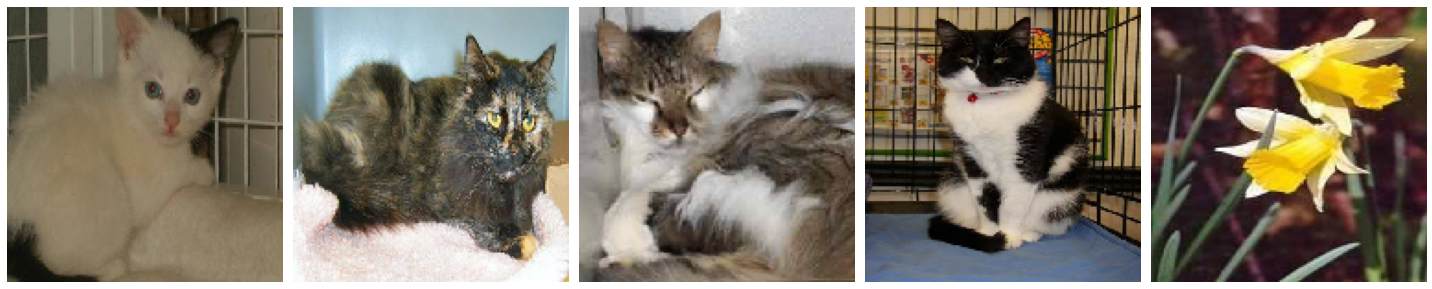

In [19]:
# sample train images
sampleTrainImages, _ = next(trainGenerator)
plotImages(sampleTrainImages[:5])

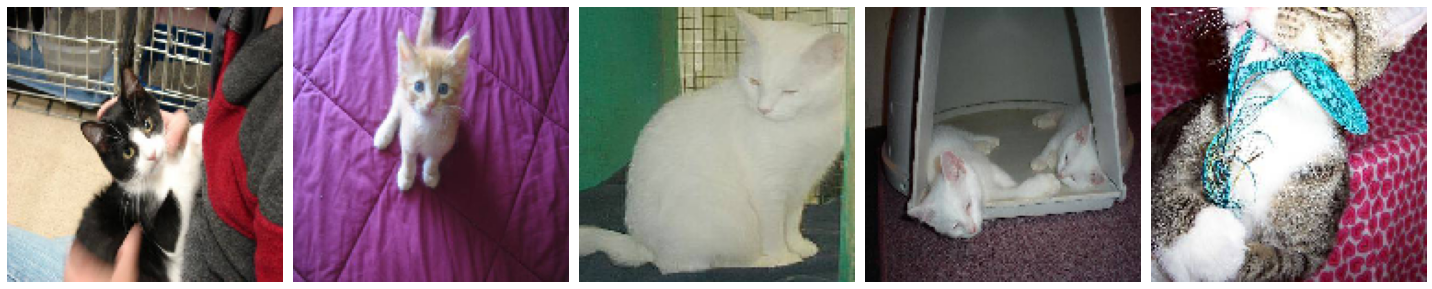

In [20]:
# sample validation images
sampleValImages, _ = next(valGenerator)
plotImages(sampleValImages[0:5])

2. Create a CNN that has the following hidden layers:

    a. 2D convolution layer with a 3x3 kernel size, has 128 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. Dense layer with 128 dimensions and ReLU as the activation layer

In [21]:
# define the model
model = tf.keras.models.Sequential([
    # convolution layer
    tf.keras.layers.Conv2D(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        filters=128, 
        kernel_size=(3,3), 
        strides=1, 
        padding='same', 
        activation='relu',
        name='conv_1'
    ),
    # max pooling
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='maxpool_1'),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # dense layer
    tf.keras.layers.Dense(units=128, activation='relu', name='dense_1'),
    # output layer: 0 for cat, 1 for not cat 
    tf.keras.layers.Dense(units=1, activation='sigmoid', name='output')
])

# compile
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 75, 75, 128)       0         
                                                                 
 flatten_2 (Flatten)         (None, 720000)            0         
                                                                 
 dense_1 (Dense)             (None, 128)               92160128  
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 92,163,841
Trainable params: 92,163,841
Non-trainable params: 0
_________________________________________________________________


3. Train the classifier for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [22]:
history_cnn = model.fit_generator(
    generator=trainGenerator,
    epochs=20,
    steps_per_epoch=100,
    validation_data=valGenerator,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 13s 127ms/step - loss: 1.7425 - accuracy: 0.8023 - val_loss: 0.6006 - val_accuracy: 0.7379
Epoch 2/20
100/100 [==============================] - 13s 128ms/step - loss: 0.3176 - accuracy: 0.8841 - val_loss: 0.5321 - val_accuracy: 0.7555
Epoch 3/20
100/100 [==============================] - 13s 126ms/step - loss: 0.2377 - accuracy: 0.9154 - val_loss: 0.7314 - val_accuracy: 0.7361
Epoch 4/20
100/100 [==============================] - 12s 125ms/step - loss: 0.1507 - accuracy: 0.9461 - val_loss: 0.6644 - val_accuracy: 0.7379
Epoch 5/20
100/100 [==============================] - 12s 124ms/step - loss: 0.0989 - accuracy: 0.9675 - val_loss: 0.5720 - val_accuracy: 0.7635
Epoch 6/20
100/100 [==============================] - 12s 124ms/step - loss: 0.0719 - accuracy: 0.9809 - val_loss: 0.8350 - val_accuracy: 0.7546
Epoch 7/20
100/100 [==============================] - 12s 123ms/step - loss: 0.0786 - accuracy: 0.9778 - val_loss: 0.7679 - val_accuracy: 0.7

4. Plot the accuracy and the loss over epochs for train & validation sets

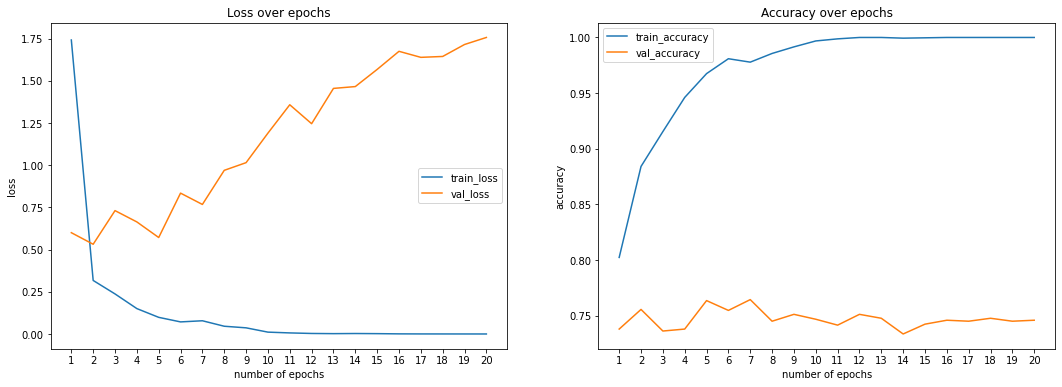

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

# loss
sns.lineplot(x=range(1, 21), y=history_cnn.history['loss'], label='train_loss', ax=ax[0])
sns.lineplot(x=range(1, 21), y=history_cnn.history['val_loss'], label='val_loss', ax=ax[0])

# accuracy
sns.lineplot(x=range(1, 21), y=history_cnn.history['accuracy'], label='train_accuracy', ax=ax[1])
sns.lineplot(x=range(1, 21), y=history_cnn.history['val_accuracy'], label='val_accuracy', ax=ax[1])

for i in range(2):
  ax[i].set_xlabel('number of epochs')
  ax[i].set_xticks([i for i in range(1, 21)])

ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')
ax[0].set_title('Loss over epochs')
ax[1].set_title('Accuracy over epochs');

5. Add the following layers to (2) before the dense layer:

    a. 2D convolution layer with a 3x3 kernel size, has 64 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. 2D convolution layer with a 3x3 kernel size, has 32 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    d. Max pooling layer of 2x2
    
    e. Dense layer with 256 dimensions and ReLU as the activation layer

In [24]:
# define the model
model2 = tf.keras.models.Sequential([
    # convolution layer 1
    tf.keras.layers.Conv2D(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        filters=128, 
        kernel_size=(3,3), 
        strides=1, 
        padding='same', 
        activation='relu',
        name='conv_1'
    ),
    # max pooling 1
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='maxpool_1'),
    # convolution layer 2
    tf.keras.layers.Conv2D(
        filters=64, 
        kernel_size=(3,3), 
        strides=1, 
        padding='same', 
        activation='relu',
        name='conv_2'
    ),
    # max pooling 2
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='maxpool_2'),
    # convolution layer 3
    tf.keras.layers.Conv2D(
        filters=32, 
        kernel_size=(3,3), 
        strides=1, 
        padding='same', 
        activation='relu',
        name='conv_3'
    ),
    # max pooling 3
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='maxpool_3'),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # dense layer 1
    tf.keras.layers.Dense(units=256, activation='relu', name='dense_1'),
    # dense layer 2
    tf.keras.layers.Dense(units=128, activation='relu', name='dense_2'),
    # output layer: 0 for cat, 1 for not cat 
    tf.keras.layers.Dense(units=1, activation='sigmoid', name='output')
])

# compile
model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 75, 75, 128)       0         
                                                                 
 conv_2 (Conv2D)             (None, 75, 75, 64)        73792     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 37, 37, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 37, 37, 32)        18464     
                                                                 
 maxpool_3 (MaxPooling2D)    (None, 18, 18, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 10368)            

6. Train the classifier again for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [25]:
history_cnn2 =model2.fit_generator(
    generator=trainGenerator,
    epochs=20,
    steps_per_epoch=100,
    validation_data=valGenerator,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 13s 124ms/step - loss: 0.4622 - accuracy: 0.8131 - val_loss: 0.6190 - val_accuracy: 0.7158
Epoch 2/20
100/100 [==============================] - 12s 122ms/step - loss: 0.3847 - accuracy: 0.8558 - val_loss: 0.6224 - val_accuracy: 0.7326
Epoch 3/20
100/100 [==============================] - 12s 123ms/step - loss: 0.3763 - accuracy: 0.8546 - val_loss: 0.7253 - val_accuracy: 0.7176
Epoch 4/20
100/100 [==============================] - 12s 123ms/step - loss: 0.3336 - accuracy: 0.8784 - val_loss: 0.5220 - val_accuracy: 0.7679
Epoch 5/20
100/100 [==============================] - 12s 122ms/step - loss: 0.3006 - accuracy: 0.8850 - val_loss: 0.4946 - val_accuracy: 0.7793
Epoch 6/20
100/100 [==============================] - 12s 124ms/step - loss: 0.2684 - accuracy: 0.8938 - val_loss: 0.5497 - val_accuracy: 0.7379
Epoch 7/20
100/100 [==============================] - 12s 123ms/step - loss: 0.2470 - accuracy: 0.9032 - val_loss: 0.5308 - val_accuracy: 0.7

7. Plot the accuracy and the loss over epochs for train & validation sets

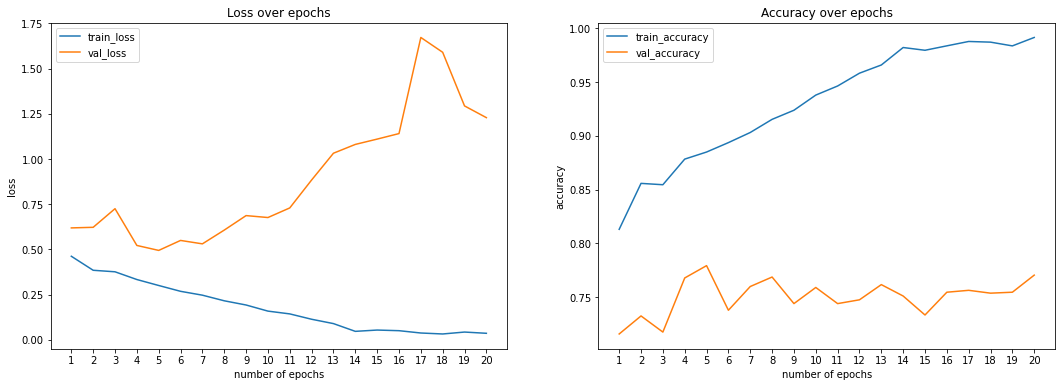

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

# loss
sns.lineplot(x=range(1, 21), y=history_cnn2.history['loss'], label='train_loss', ax=ax[0])
sns.lineplot(x=range(1, 21), y=history_cnn2.history['val_loss'], label='val_loss', ax=ax[0])

# accuracy
sns.lineplot(x=range(1, 21), y=history_cnn2.history['accuracy'], label='train_accuracy', ax=ax[1])
sns.lineplot(x=range(1, 21), y=history_cnn2.history['val_accuracy'], label='val_accuracy', ax=ax[1])

for i in range(2):
  ax[i].set_xlabel('number of epochs')
  ax[i].set_xticks([i for i in range(1, 21)])

ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')
ax[0].set_title('Loss over epochs')
ax[1].set_title('Accuracy over epochs');